In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [54]:
df = pd.read_csv("SaYoPillow.csv", encoding='latin1', delimiter='\t')

In [55]:
df.head()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level,fitness,Unnamed: 7
0,91.840,16.600,89.840,1.840,74.20,3,0.333333,NaN
1,91.552,15.880,89.552,1.552,72.76,3,0.333333,NaN
2,96.000,10.000,95.000,7.000,60.00,1,1.000000,NaN
3,90.768,13.920,88.768,0.768,68.84,3,0.333333,NaN
4,97.872,6.496,96.248,8.248,53.12,1,1.000000,NaN


In [56]:
df = df.drop('Unnamed: 7', axis=1)


In [57]:
df.head()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level,fitness
0,91.840,16.600,89.840,1.840,74.20,3,0.333333
1,91.552,15.880,89.552,1.552,72.76,3,0.333333
2,96.000,10.000,95.000,7.000,60.00,1,1.000000
3,90.768,13.920,88.768,0.768,68.84,3,0.333333
4,97.872,6.496,96.248,8.248,53.12,1,1.000000


In [58]:
df.tail()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level,fitness
625,92.960,10.960,90.960,3.440,62.40,2,0.50
626,98.064,6.752,96.376,8.376,53.44,1,1.00
627,86.880,17.752,84.256,0.000,78.76,4,0.25
628,95.728,9.728,94.592,6.728,59.32,1,1.00
629,93.392,11.392,91.392,4.088,63.48,2,0.50


In [59]:
df.isnull().sum()

body_temperature    0
limb_movement       0
Blood_oxygen        0
Sleeping_hours      0
Heart_rate          0
Stress_level        0
fitness             0
dtype: int64

In [60]:
df.info

<bound method DataFrame.info of      body_temperature  limb_movement  Blood_oxygen  Sleeping_hours  \
0              91.840         16.600        89.840           1.840   
1              91.552         15.880        89.552           1.552   
2              96.000         10.000        95.000           7.000   
3              90.768         13.920        88.768           0.768   
4              97.872          6.496        96.248           8.248   
..                ...            ...           ...             ...   
625            92.960         10.960        90.960           3.440   
626            98.064          6.752        96.376           8.376   
627            86.880         17.752        84.256           0.000   
628            95.728          9.728        94.592           6.728   
629            93.392         11.392        91.392           4.088   

     Heart_rate  Stress_level   fitness  
0         74.20             3  0.333333  
1         72.76             3  0.333333  
2

In [61]:
df.describe()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level,fitness
count,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,92.80000,11.700000,90.900000,3.700000,64.500000,2.200000,0.616667
std,3.52969,4.299629,3.902483,3.054572,9.915277,1.167117,0.323435
min,85.00000,4.000000,82.000000,0.000000,50.000000,1.000000,0.250000
25%,90.50000,8.500000,88.500000,0.500000,56.250000,1.000000,0.333333
50%,93.00000,11.000000,91.000000,3.500000,62.500000,2.000000,0.500000
75%,95.50000,15.750000,94.250000,6.500000,72.500000,3.000000,1.000000
max,99.00000,19.000000,97.000000,9.000000,85.000000,4.000000,1.000000


In [79]:
df.columns

Index(['body_temperature', 'limb_movement', 'Blood_oxygen', 'Sleeping_hours',
       'Heart_rate', 'Stress_level', 'fitness'],
      dtype='object')

In [62]:
df.nunique()

body_temperature    626
limb_movement       626
Blood_oxygen        626
Sleeping_hours      501
Heart_rate          626
Stress_level          4
fitness               4
dtype: int64

In [63]:
object_columns = df.select_dtypes(include='object').columns 
print("Object Columns:") 
print(object_columns) 
print() 
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns 
print("Numerical Columns:") 
print(numerical_columns) 

Object Columns:
Index([], dtype='object')

Numerical Columns:
Index(['body_temperature', 'limb_movement', 'Blood_oxygen', 'Sleeping_hours',
       'Heart_rate', 'Stress_level', 'fitness'],
      dtype='object')


In [64]:
df['fitness'].unique()

array([0.33333333, 1.        , 0.5       , 0.25      ])

In [65]:
df['fitness'].value_counts() 


1.000000    252
0.333333    126
0.500000    126
0.250000    126
Name: fitness, dtype: int64

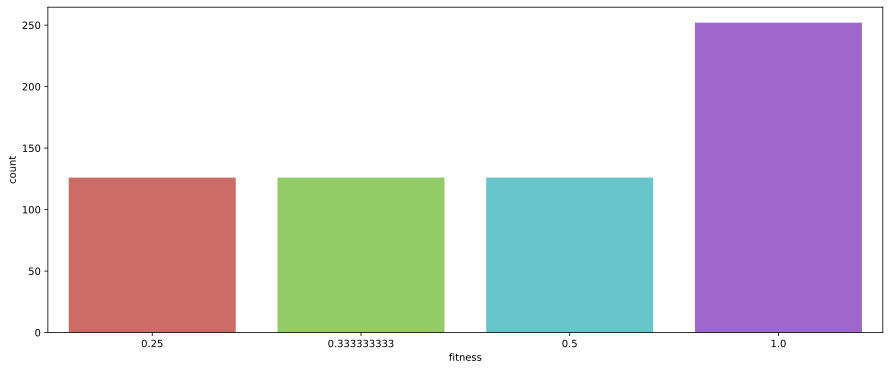

In [66]:
plt.figure(figsize=(15,6)) 
sns.countplot(df['fitness'], data = df, palette = 'hls') 
plt.xticks(rotation = 0) 
plt.show()


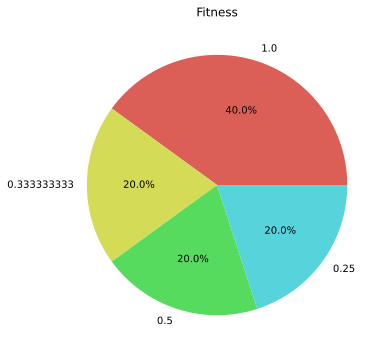

In [67]:
plt.figure(figsize=(15, 6)) 
counts = df['fitness'].value_counts() 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls')) 
plt.title('Fitness') 
plt.show()


In [68]:
import plotly.graph_objects as go 


In [69]:
fig = go.Figure(data=[go.Bar(x=df['fitness'].value_counts().index, y=df['fitness'].value_counts())]) 
fig.update_layout( 
 title= 'fitness data', 
 xaxis_title="Categories", 
 yaxis_title="Count" 
 ) 
fig.show()


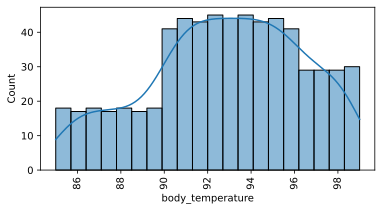

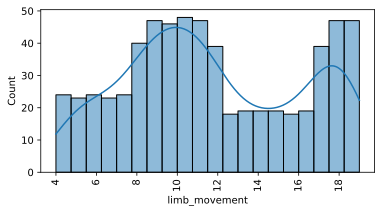

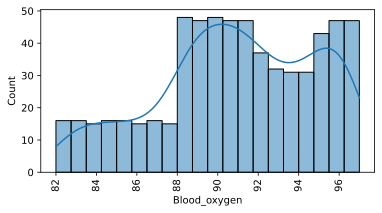

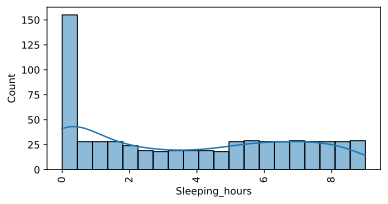

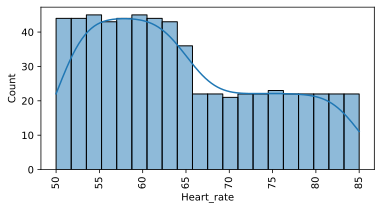

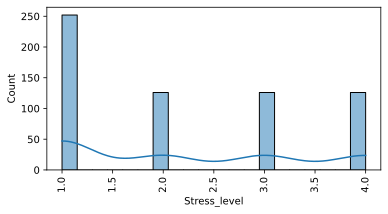

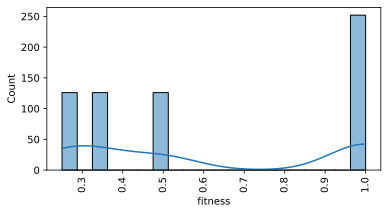

In [70]:
for i in numerical_columns: 
 plt.figure(figsize=(6,3)) 
 sns.histplot(df[i], kde = True, bins = 20, palette = 'hls') 
 plt.xticks(rotation = 90) 
 plt.show() 


In [71]:
df_corr = df.corr()
df_corr 

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level,fitness
body_temperature,1.000000,-0.896412,0.998108,0.954860,-0.889237,-0.938483,0.890496
limb_movement,-0.896412,1.000000,-0.898527,-0.901102,0.991738,0.950061,-0.899087
Blood_oxygen,0.998108,-0.898527,1.000000,0.950189,-0.889210,-0.941192,0.895362
Sleeping_hours,0.954860,-0.901102,0.950189,1.000000,-0.891855,-0.938365,0.947902
Heart_rate,-0.889237,0.991738,-0.889210,-0.891855,1.000000,0.960713,-0.892710
Stress_level,-0.938483,0.950061,-0.941192,-0.938365,0.960713,1.000000,-0.946347
fitness,0.890496,-0.899087,0.895362,0.947902,-0.892710,-0.946347,1.000000


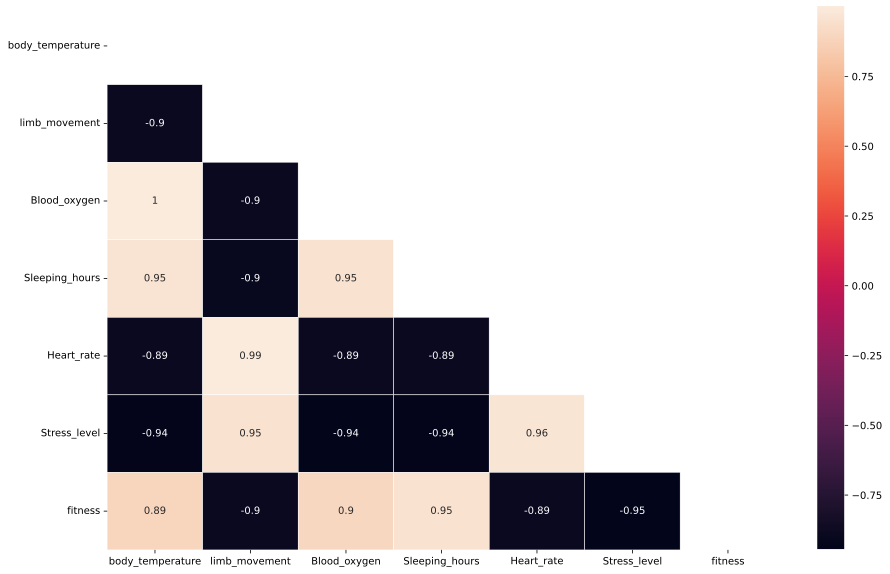

In [72]:
plt.figure(figsize=(15, 10)) 
matrix = np.triu(df_corr) 
sns.heatmap(df_corr, annot=True, linewidth=.5, mask=matrix, cmap="rocket"); 
plt.show()


In [73]:
fig = go.Figure(data=go.Heatmap( 
 z=df_corr.values, 
 x=df_corr.columns, 
 y=df_corr.index, 
 colorscale='Viridis', # Use a valid colorscale name  colorbar=dict(title='Correlation') 
))


In [78]:
fig.update_layout( 
 title='Correlation Heatmap', 
 xaxis=dict(title='X-axis labels'), 
 yaxis=dict(title='Y-axis labels'), 
 width=500, 
 height=500, 
 plot_bgcolor='white' 
) 
fig.show()


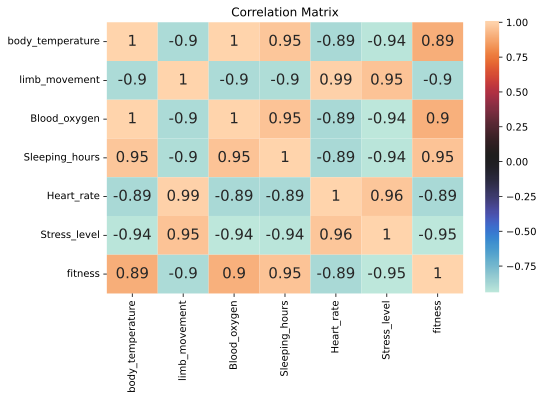

In [90]:
fig, ax = plt.subplots(figsize=(8,5))
cols=['body_temperature', 'limb_movement', 'Blood_oxygen', 'Sleeping_hours',
       'Heart_rate', 'Stress_level', 'fitness']
sns.heatmap(df[cols].corr(), cmap="icefire", annot=True, annot_kws={'size': 15})
plt.title("Correlation Matrix")
plt.show()

In [86]:
df.head()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level,fitness
0,91.840,16.600,89.840,1.840,74.20,3,0.333333
1,91.552,15.880,89.552,1.552,72.76,3,0.333333
2,96.000,10.000,95.000,7.000,60.00,1,1.000000
3,90.768,13.920,88.768,0.768,68.84,3,0.333333
4,97.872,6.496,96.248,8.248,53.12,1,1.000000


In [87]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 


In [91]:
features_to_scale = ['body_temperature', 'limb_movement', 'Blood_oxygen', 'Sleeping_hours',
       'Heart_rate', 'Stress_level']  
target = 'fitness' 


In [93]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(df[features_to_scale], df[target], test_size=0.25)

In [96]:

# Perform feature scaling for the appropriate features
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train_scaled[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test_scaled[features_to_scale])


In [98]:
# Create and train the linear regression model 
model_lr = LinearRegression() 
model_lr.fit(X_train_scaled, y_train) 


LinearRegression()

In [99]:
# Make predictions on the test set 
y_pred = model_lr.predict(X_test_scaled) 

In [100]:
# Evaluate the model using root mean squared error (RMSE) 
rmse = mean_squared_error(y_test, y_pred, squared=False) 
print('Root Mean Squared Error:', rmse) 

Root Mean Squared Error: 0.07329161418875348


In [102]:
from sklearn.metrics import r2_score 

# Calculate R-squared score 
r2_lr = r2_score(y_test, y_pred) 
print('R-squared Score:', r2_lr) 

R-squared Score: 0.9480504053917935


In [103]:
# Calculate R-squared score 
r2_lr = r2_score(y_test, y_pred) 
print('R-squared Score:', r2_lr) 
# Calculate Mean Squared Error (MSE) 
mse = mean_squared_error(y_test, y_pred) 
print('Mean Squared Error:', mse) 

R-squared Score: 0.9480504053917935
Mean Squared Error: 0.005371660710393089


In [105]:
from sklearn.tree import DecisionTreeRegressor 
from xgboost import XGBRegressor

# Create and train the Decision Tree Regressor 
dt_regressor = DecisionTreeRegressor(random_state=42) 
dt_regressor.fit(X_train_scaled, y_train) 


DecisionTreeRegressor(random_state=42)

In [107]:
# Make predictions on the test set using Decision Tree Regressor  
y_pred_dt = dt_regressor.predict(X_test_scaled) 

In [108]:
# Calculate R-squared score for Decision Tree Regressor 
r2_dt = r2_score(y_test, y_pred_dt) 
print('Decision Tree Regressor - R-squared Score:', r2_dt) 

Decision Tree Regressor - R-squared Score: 0.9846977070821211


In [109]:
# Calculate Mean Squared Error (MSE) for Decision Tree Regressor 
mse_dt = mean_squared_error(y_test, y_pred_dt) 
print('Decision Tree Regressor - Mean Squared Error:', mse_dt) 

Decision Tree Regressor - Mean Squared Error: 0.0015822784810126582


In [110]:
# Create and train the XGBoost Regressor 
xgb_regressor = XGBRegressor(random_state=42) 
xgb_regressor.fit(X_train_scaled, y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=64,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
# Make predictions on the test set using XGBoost Regressor 
y_pred_xgb = xgb_regressor.predict(X_test_scaled) 

In [112]:
# Calculate R-squared score for XGBoost Regressor 
r2_xgb = r2_score(y_test, y_pred_xgb) 
print('XGBoost Regressor - R-squared Score:', r2_xgb) 
# Calculate Mean Squared Error (MSE) for XGBoost Regressor 
mse_xgb = mean_squared_error(y_test, y_pred_xgb) 
print('XGBoost Regressor - Mean Squared Error:', mse_xgb)

XGBoost Regressor - R-squared Score: 0.9847035790449773
XGBoost Regressor - Mean Squared Error: 0.0015816713118440612
